### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de los datos

In [2]:
store = pd.read_csv("store.csv")
train = pd.read_csv("train.csv", dtype={"StateHoliday":"str"})
test = pd.read_csv("test.csv")

### Análisis y limpieza de los datos Dataset 'store' y 'train'

In [3]:
# Unimos la tabla store y train

df = pd.merge(store, train)
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [5]:
df.shape

(1017209, 18)

In [6]:
# Convertimos la columna "Date" a formato datetime
df["Date"] = pd.to_datetime(df["Date"])

###### Valores atípicos

<Axes: >

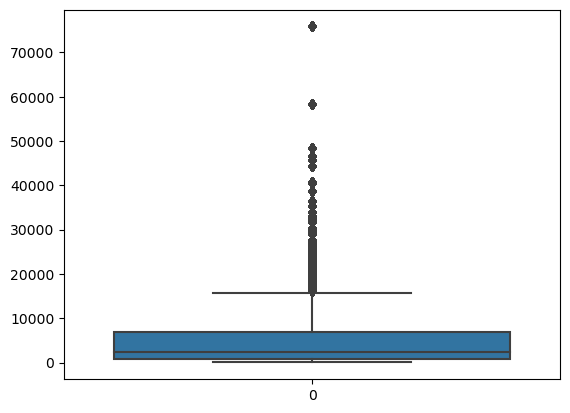

In [7]:
sns.boxplot(df["CompetitionDistance"])

In [8]:
# Eliminamos valores atipicos de la columnna CompetitionDistance

_ = df[df["CompetitionDistance"] > 30000].index.tolist()
df.drop(_, axis=0, inplace=True)

In [9]:
df.shape

(999311, 18)

<Axes: >

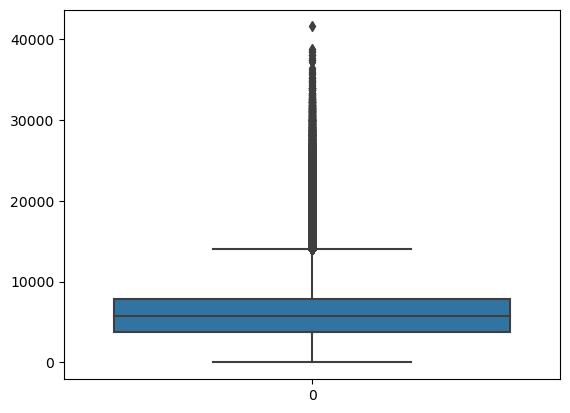

In [10]:
sns.boxplot(df["Sales"])

In [11]:
# Eliminamos valores atipicos de la columnna sales

_ = df[df["Sales"] > 30000].index.tolist()
df.drop(_, axis=0, inplace=True)

In [12]:
df.shape

(999159, 18)

<Axes: >

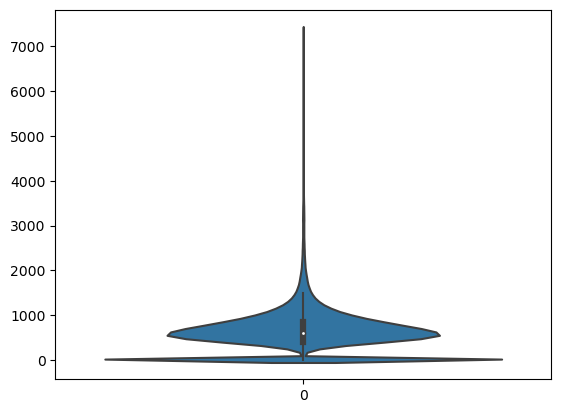

In [13]:
sns.violinplot(df["Customers"])

In [14]:
# Eliminamos valores atipicos de la columnna customers

_ = df[df["Customers"] > 2000].index.tolist()
df.drop(_, axis=0, inplace=True)

In [15]:
df.shape

(984573, 18)

In [16]:
# Comprobamos valores nulos
df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    314856
CompetitionOpenSinceYear     314856
Promo2                            0
Promo2SinceWeek              478225
Promo2SinceYear              478225
PromoInterval                478225
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

##### Rellenamos los valores nulos

In [17]:
# Competition Distance
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(150000.0)

In [18]:
# CompetitionOpenSinceMonth
df["CompetitionOpenSinceMonth"] = df.apply(lambda x: 0 if np.isnan(x["CompetitionOpenSinceMonth"]) else x["CompetitionOpenSinceMonth"], axis=1)

In [19]:
# CompetitionOpenSinceYear
df["CompetitionOpenSinceYear"] = df.apply(lambda x: 0 if np.isnan(x["CompetitionOpenSinceYear"]) else x["CompetitionOpenSinceYear"], axis=1)

In [20]:
# Promo2SinceWeek
df["Promo2SinceWeek"] = df.apply(lambda x: 0 if np.isnan(x["Promo2SinceWeek"]) else x["Promo2SinceWeek"], axis=1) 

In [21]:
# Promo2SinceYear
df["Promo2SinceYear"] = df.apply(lambda x: 0 if np.isnan(x["Promo2SinceYear"]) else x["Promo2SinceYear"], axis=1)

In [22]:
# promo_interval
month_map = {1: "Jan", 2: "Fev", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

df["PromoInterval"].fillna(0, inplace=True)

# Creamos una nueva variable para definir el mes en el que empieza la promoción
df["month_map"] = df["Date"].dt.month.map(month_map)

# Creamos una variable que nos indica si el mes seleccionado tenia aplicada una promocion
df["is_promo"] = df[["PromoInterval", "month_map"]].apply(lambda x: 0 if x["PromoInterval"] == 0 else 1 if x["month_map"] in x["PromoInterval"].split(",") else 0, axis=1)

In [23]:
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month_map,is_promo
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1,Jul,0
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1,Jul,0
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1,Jul,0
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1,Jul,0
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1,Jul,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1,Jan,0
1017205,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1,Jan,0
1017206,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1,Jan,0
1017207,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1,Jan,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984573 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      984573 non-null  int64         
 1   StoreType                  984573 non-null  object        
 2   Assortment                 984573 non-null  object        
 3   CompetitionDistance        984573 non-null  float64       
 4   CompetitionOpenSinceMonth  984573 non-null  float64       
 5   CompetitionOpenSinceYear   984573 non-null  float64       
 6   Promo2                     984573 non-null  int64         
 7   Promo2SinceWeek            984573 non-null  float64       
 8   Promo2SinceYear            984573 non-null  float64       
 9   PromoInterval              984573 non-null  object        
 10  DayOfWeek                  984573 non-null  int64         
 11  Date                       984573 non-null  datetim

##### Dummies

In [25]:
# StoreType
StoreType_dummie = pd.get_dummies(df["StoreType"], prefix="StoreType")
df.drop("StoreType", axis=1, inplace=True)

df = pd.concat([df, StoreType_dummie], axis=1)

In [26]:
# Assortment
Assortment_dummie = pd.get_dummies(df["Assortment"], prefix="Assortment")
df.drop("Assortment", axis=1, inplace=True)

df = pd.concat([df, Assortment_dummie], axis=1)

In [27]:
# StateHoliday
StateHoliday_dummie = pd.get_dummies(df["StateHoliday"], prefix="StateHoliday")
df.drop("StateHoliday", axis=1, inplace=True)

df = pd.concat([df, StateHoliday_dummie], axis=1)

##### Creación de columnas de fechas

In [28]:
# Semana
df["Week"] = df["Date"].dt.isocalendar().week

In [29]:
# Mes
df["Month"] = df["Date"].dt.month

In [30]:
# Año
df["Year"] = df["Date"].dt.isocalendar().year

In [31]:
df[(df["Sales"] == 0) & (df["Open"] == 0)]

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,...,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Week,Month,Year
5,1,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015-07-26,...,1,0,0,1,0,0,0,30,7,2015
12,1,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015-07-19,...,1,0,0,1,0,0,0,29,7,2015
19,1,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015-07-12,...,1,0,0,1,0,0,0,28,7,2015
26,1,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015-07-05,...,1,0,0,1,0,0,0,27,7,2015
33,1,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015-06-28,...,1,0,0,1,0,0,0,26,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017182,1115,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",7,2013-01-27,...,0,0,1,1,0,0,0,4,1,2013
1017189,1115,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",7,2013-01-20,...,0,0,1,1,0,0,0,3,1,2013
1017196,1115,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",7,2013-01-13,...,0,0,1,1,0,0,0,2,1,2013
1017203,1115,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",7,2013-01-06,...,0,0,1,1,0,0,0,1,1,2013


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984573 entries, 0 to 1017208
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      984573 non-null  int64         
 1   CompetitionDistance        984573 non-null  float64       
 2   CompetitionOpenSinceMonth  984573 non-null  float64       
 3   CompetitionOpenSinceYear   984573 non-null  float64       
 4   Promo2                     984573 non-null  int64         
 5   Promo2SinceWeek            984573 non-null  float64       
 6   Promo2SinceYear            984573 non-null  float64       
 7   PromoInterval              984573 non-null  object        
 8   DayOfWeek                  984573 non-null  int64         
 9   Date                       984573 non-null  datetime64[ns]
 10  Sales                      984573 non-null  int64         
 11  Customers                  984573 non-null  int64  

In [33]:
# Eliminamos las columnas que no nos sirven para nuestro modelo de entrenamiento
df = df.drop(["PromoInterval", "month_map"], axis=1)

In [34]:
corr = df.corr()

C:\Users\ninel\AppData\Local\Temp\ipykernel_19684\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

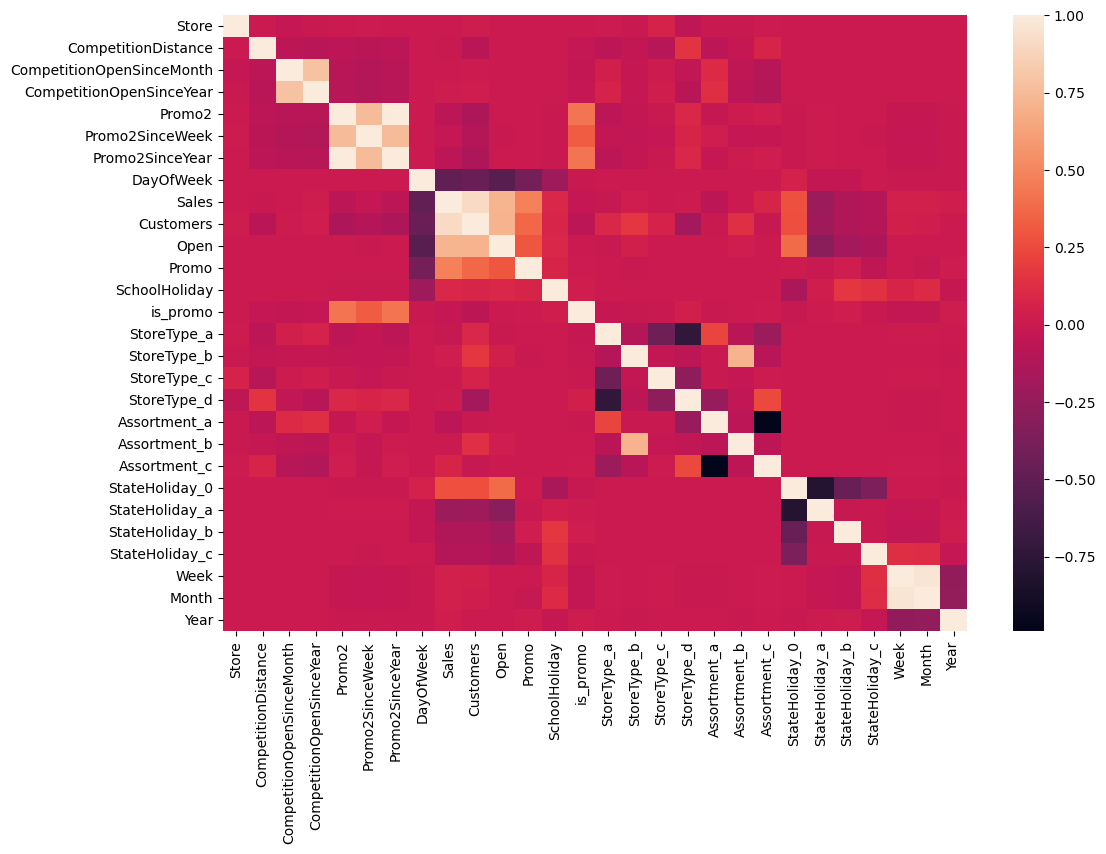

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

### Análisis y limpieza de datos Dataset 'Test'

In [36]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [38]:
# Eliminamos registros con valores nulos en la columna "Open" y la convertimos a tipo int

test.dropna(inplace=True)
test["Open"] = test["Open"].astype("int64")

##### Dummies



In [39]:
# StateHoliday
StateHoliday_dummie = pd.get_dummies(test["StateHoliday"], prefix="StateHoliday")
test.drop("StateHoliday", axis=1, inplace=True)

test = pd.concat([test, StateHoliday_dummie], axis=1)

##### Creacion de columnas fechas

In [40]:
# Convertimos la columna "Date" a formato datetime
test["Date"] = pd.to_datetime(test["Date"])

In [41]:
# Semana
test["Week"] = test["Date"].dt.isocalendar().week

In [42]:
# Mes
test["Month"] = test["Date"].dt.month

In [43]:
# Año
test["Year"] = test["Date"].dt.isocalendar().year

In [44]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Week,Month,Year
0,1,1,4,2015-09-17,1,1,0,1,0,38,9,2015
1,2,3,4,2015-09-17,1,1,0,1,0,38,9,2015
2,3,7,4,2015-09-17,1,1,0,1,0,38,9,2015
3,4,8,4,2015-09-17,1,1,0,1,0,38,9,2015
4,5,9,4,2015-09-17,1,1,0,1,0,38,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,1,0,31,8,2015
41084,41085,1112,6,2015-08-01,1,0,0,1,0,31,8,2015
41085,41086,1113,6,2015-08-01,1,0,0,1,0,31,8,2015
41086,41087,1114,6,2015-08-01,1,0,0,1,0,31,8,2015


In [45]:
df.columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'is_promo', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Week', 'Month', 'Year'],
      dtype='object')

##### Añadimos las columnas en común de las tiendas de nuestro dataset 'DF' a nuestro dataset 'Test'

In [46]:
df1 = df[["Store", "Month", "Promo2", "is_promo", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear",
        'StoreType_a', 'StoreType_b','StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c']]

In [47]:
# Como arriba tenemos valores duplicados, vamos a eliminarlos
df1 = df1.drop_duplicates()
df1

,Store,Month,Promo2,is_promo,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,7,0,0,1270.0,9.0,2008.0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0
31,1,6,0,0,1270.0,9.0,2008.0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0
57,1,6,0,0,1270.0,9.0,2008.0,0.0,0.0,0,0,1,0,1,0,0,0,1,0,0
61,1,5,0,0,1270.0,9.0,2008.0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0
67,1,5,0,0,1270.0,9.0,2008.0,0.0,0.0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016540,1115,10,1,0,5350.0,0.0,0.0,22.0,2012.0,0,0,0,1,0,0,1,1,0,0,0
1016568,1115,10,1,0,5350.0,0.0,0.0,22.0,2012.0,0,0,0,1,0,0,1,0,1,0,0
1016571,1115,9,1,0,5350.0,0.0,0.0,22.0,2012.0,0,0,0,1,0,0,1,1,0,0,0
1016601,1115,8,1,0,5350.0,0.0,0.0,22.0,2012.0,0,0,0,1,0,0,1,1,0,0,0


In [48]:
# Unimos el dataset "Test" con el dataset anterior
df2 = pd.merge(test, df1)

In [49]:
df2

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Week,...,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_b,StateHoliday_c
0,1,1,4,2015-09-17,1,1,0,1,0,38,...,0.0,0,0,1,0,1,0,0,0,0
1,857,1,3,2015-09-16,1,1,0,1,0,38,...,0.0,0,0,1,0,1,0,0,0,0
2,1713,1,2,2015-09-15,1,1,0,1,0,38,...,0.0,0,0,1,0,1,0,0,0,0
3,2569,1,1,2015-09-14,1,1,0,1,0,38,...,0.0,0,0,1,0,1,0,0,0,0
4,3425,1,7,2015-09-13,0,0,0,1,0,37,...,0.0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40256,29087,1094,6,2015-08-15,0,0,0,0,1,33,...,2014.0,0,0,0,1,1,0,0,0,0
40257,29093,1102,6,2015-08-15,0,0,0,0,1,33,...,2014.0,1,0,0,0,1,0,0,0,0
40258,29095,1104,6,2015-08-15,0,0,0,0,1,33,...,2011.0,0,0,0,1,1,0,0,0,0
40259,29098,1107,6,2015-08-15,1,0,0,0,1,33,...,2010.0,1,0,0,0,1,0,0,0,0


In [50]:
df2["is_promo"].value_counts()

0    36572
1     3689
Name: is_promo, dtype: int64

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40261 entries, 0 to 40260
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         40261 non-null  int64         
 1   Store                      40261 non-null  int64         
 2   DayOfWeek                  40261 non-null  int64         
 3   Date                       40261 non-null  datetime64[ns]
 4   Open                       40261 non-null  int64         
 5   Promo                      40261 non-null  int64         
 6   SchoolHoliday              40261 non-null  int64         
 7   StateHoliday_0             40261 non-null  uint8         
 8   StateHoliday_a             40261 non-null  uint8         
 9   Week                       40261 non-null  UInt32        
 10  Month                      40261 non-null  int64         
 11  Year                       40261 non-null  UInt32        
 12  Prom

In [52]:
# Eliminamos la columna "Id" ya que no nos da información útil
df2.drop("Id", axis=1, inplace=True)

In [53]:
# Creamos un nuevo dataset a partir del anterior sin la columna "Date". Este df es el que vamos a utilizar para predecir
df3 = df2.drop(["Date"], axis=1)

In [54]:
df3.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'Week', 'Month', 'Year', 'Promo2',
       'is_promo', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'StateHoliday_b',
       'StateHoliday_c'],
      dtype='object')

## Visualización de los datos

#### Promo:

C:\Users\ninel\AppData\Local\Temp\ipykernel_19684\1055553618.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  promo_sales_customers = df.groupby('Promo')['Sales', 'Customers'].mean()


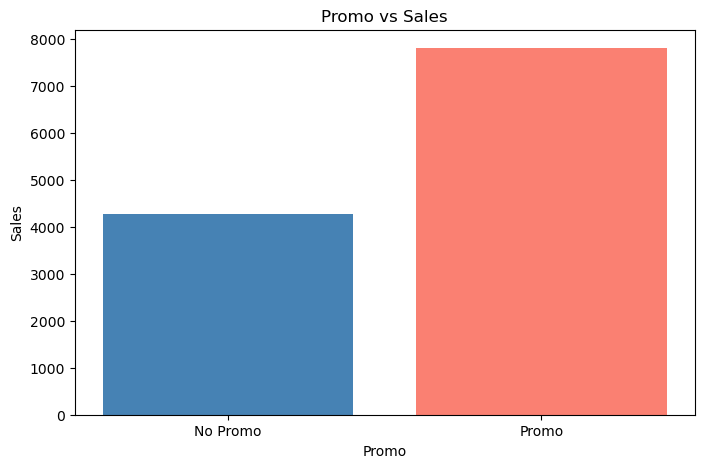

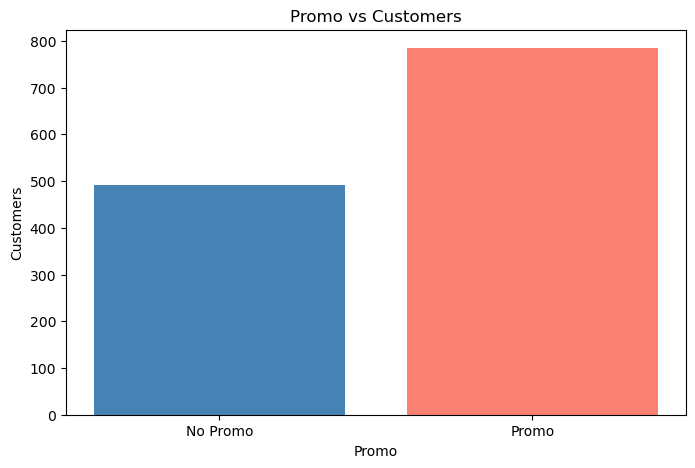

In [55]:
# Agrupamos los datos por la variable "Promo" y calculamos la media de ventas y clientes para cada grupo
promo_sales_customers = df.groupby('Promo')['Sales', 'Customers'].mean()

# Creamos el gráfico de barras para la relación entre "Promo" y "Sales"
plt.figure(figsize=(8, 5))
colors_sales = ['steelblue', 'salmon']
plt.bar(promo_sales_customers.index, promo_sales_customers['Sales'], color = colors_sales)
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.title('Promo vs Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()

# Creamos el gráfico de barras para la relación entre "Promo" y "Customers"
plt.figure(figsize=(8, 5))
colors_customers = ['steelblue', 'salmon']
plt.bar(promo_sales_customers.index, promo_sales_customers['Customers'], color = colors_customers)
plt.xlabel('Promo')
plt.ylabel('Customers')
plt.title('Promo vs Customers')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()

* En los gráficos podemos ver como las ventas y el número de clientes aumentan considerablemente los días que hay promociones.

#### Sales:

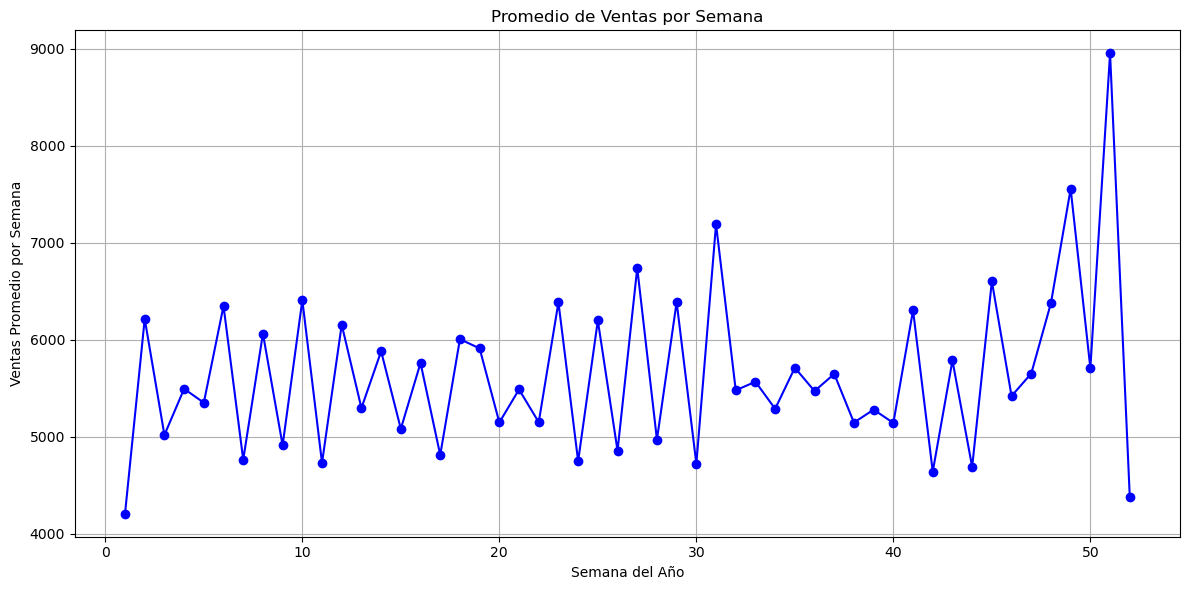

In [56]:
# Calculamos el promedio de ventas por semana
average_sales_per_week = df.groupby('Week')['Sales'].mean()

# Calculamos el porcentaje de cambio en las ventas por semana
sales_percent_change_per_week = df.groupby('Week')['Sales'].pct_change() * 100

# Creamos el gráfico del promedio de ventas por semana
plt.figure(figsize=(12, 6)) 
plt.plot(average_sales_per_week.index, average_sales_per_week.values, marker='o', linestyle='-', color='blue')

# Agregamos etiquetas y título
plt.xlabel('Semana del Año')
plt.ylabel('Ventas Promedio por Semana')
plt.title('Promedio de Ventas por Semana')

# Mostramos el gráfico
plt.tight_layout()  
plt.grid()  
plt.show()

* En el gráfico podemos observar como las ventas aumentan en las últimas semanas del año, coincidiendo con la Navidad y con las ofertas de descuento de fin de año. 

#### DayOfWeek:

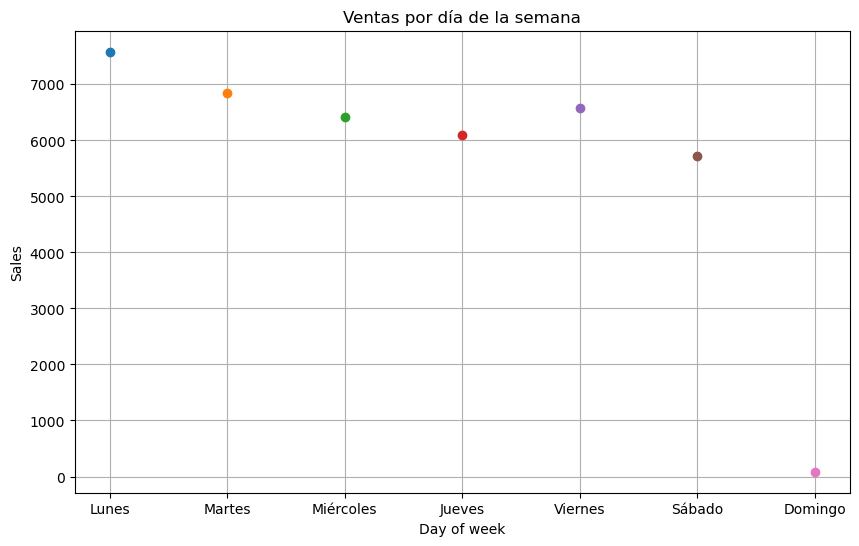

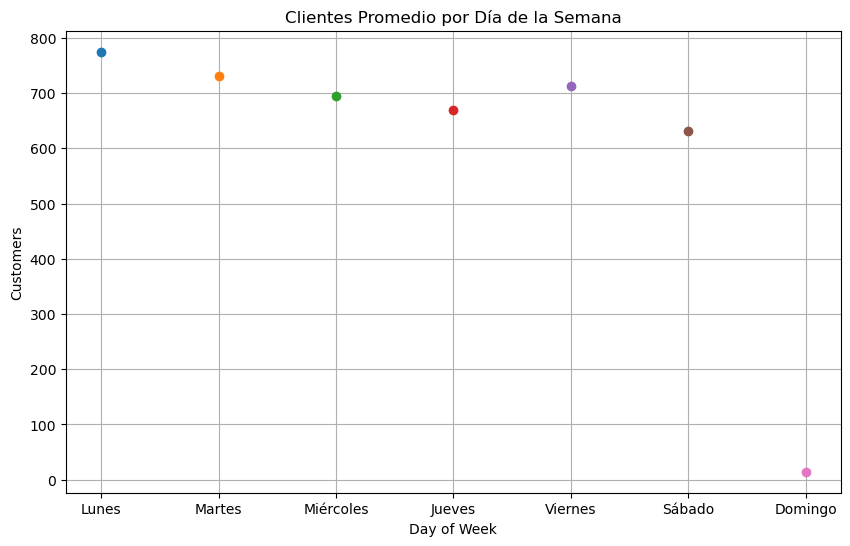

In [57]:
# Definimos la lista de colores para cada día de la semana (colores personalizados)
colores_personalizados = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Agrupamos las ventas y clientes por día de la semana y calculamos la media
ventas_por_dia_semana = df.groupby('DayOfWeek')['Sales'].mean()
clientes_por_dia_semana = df.groupby('DayOfWeek')['Customers'].mean()

# Creamos el gráfico de líneas para la relación entre "Sales" y "DayOfWeek"
plt.figure(figsize=(10, 6))
for i, (day, sales) in enumerate(ventas_por_dia_semana.items()):
    plt.plot(day, sales, marker='o', linestyle='-', color=colores_personalizados[i])
plt.xlabel('Day of week')
plt.ylabel('Sales')
plt.title('Ventas por día de la semana')
plt.xticks(range(1, 8), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid()
plt.show()

# Creamos el gráfico de líneas para la relación entre "Customers" y "DayOfWeek"
plt.figure(figsize=(10, 6))
for i, (day, customers) in enumerate(clientes_por_dia_semana.items()):
    plt.plot(day, customers, marker='o', linestyle='-', color=colores_personalizados[i])
plt.xlabel('Day of Week')
plt.ylabel('Customers')
plt.title('Clientes Promedio por Día de la Semana')
plt.xticks(range(1, 8), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid()
plt.show()

* En el gráfico podemos ver que el día con menor ventas y clientes es el Domingo. Esto podría deberse a que la mayoría de las tiendas están cerradas ese día. Por otro lado el día con mayor ventas y clientes es el Lunes, el motivo podría ir relacionado  al echo de que las tiendas están cerradas el día anterior. 

#### StoreType:

In [58]:
from IPython.display import display
# Agrupamos los datos por cada tipo de tienda (StoreType_a, StoreType_b, StoreType_c, StoreType_ad) y calculamos la suma de "Customers" y "Sales" para cada tipo
sales_customers_by_store_type = df.groupby(['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'])['Customers', 'Sales'].sum()

# Mostramos el cuadro con los valores de "Customers" y "Sales" para cada tipo de tienda
display(sales_customers_by_store_type)

C:\Users\ninel\AppData\Local\Temp\ipykernel_19684\843631307.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_customers_by_store_type = df.groupby(['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'])['Customers', 'Sales'].sum()


Customers       Sales
StoreType_a StoreType_b StoreType_c StoreType_d                       
0           0           0           1            154917664  1744782439
                        1           0             89320866   756397664
            1           0           0             11487273    59294922
1           0           0           0            338297296  2965518150

* Podemos ver en la tabla que las tiendas de tipo A tienen mayor cantidad de ventas y clientes, seguidas por las tiendas de tipo D

## Modelos de predicción 

### Regresión lineal con Keras

* Predicción del número de consumidores

In [59]:
# División de datos
x_train = df[df3.columns]
y_train = df["Customers"]

x_test = df3

In [60]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [63]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.16397854e-01, 9.25954501e-02, 8.77980124e-02, 8.21448876e-02,
       6.91822771e-02, 6.84523539e-02, 6.36628319e-02, 5.35359187e-02,
       4.93408802e-02, 4.22489841e-02, 3.79429661e-02, 3.78487921e-02,
       3.41506706e-02, 3.34270245e-02, 3.13929667e-02, 2.89658420e-02,
       2.52101443e-02, 1.32040649e-02, 1.21310554e-02, 1.10822164e-02,
       8.05199163e-03, 1.23278985e-03, 2.51700157e-08, 7.63956869e-32,
       3.24156390e-32, 1.68336970e-32])

In [64]:
x_train.shape, y_train.shape, x_test.shape

((984573, 26), (984573,), (40261, 26))

##### Librerías

In [65]:
from keras import Sequential        # modelo secuencial
from keras.layers import Dense      # capa densa, full conectes

from keras.callbacks import Callback, EarlyStopping   # progreso  # para parar antes

from tensorflow.keras.optimizers.legacy import RMSprop  #optimizador, el que hace las derivadas

In [66]:
model = Sequential() # inicializa una red vacia

model.add(Dense(128, activation='relu', input_shape=[x_train.shape[1]]))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))



optimizer = RMSprop(0.001)



model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])  

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3456      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 34,497
Trainable params: 34,497
Non-traina

In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [69]:
model.fit(x_train, y_train, validation_split=0.2, epochs=10, callbacks=early_stop)

Epoch 1/10
24615/24615 [==============================] - 27s 1ms/step - loss: 42620.7812 - mae: 138.6712 - mse: 42620.7812 - val_loss: 70838.9297 - val_mae: 181.7944 - val_mse: 70838.9297
Epoch 2/10
24615/24615 [==============================] - 26s 1ms/step - loss: 19991.3613 - mae: 92.4772 - mse: 19991.3613 - val_loss: 94378.5547 - val_mae: 209.3346 - val_mse: 94378.5547
Epoch 3/10
24615/24615 [==============================] - 26s 1ms/step - loss: 14364.2764 - mae: 76.9455 - mse: 14364.2764 - val_loss: 114685.3281 - val_mae: 224.8055 - val_mse: 114685.3281
Epoch 4/10
24615/24615 [==============================] - 27s 1ms/step - loss: 12262.1533 - mae: 70.4410 - mse: 12262.1533 - val_loss: 99459.0625 - val_mae: 211.0282 - val_mse: 99459.0625


In [70]:
y_pred_customer = model.predict(x_test).flatten()

1259/1259 [==============================] - 1s 591us/step


In [71]:
y_pred_customer

array([532.15656  , 503.9829   , 560.21954  , ...,   6.2121115,
       155.15274  ,   7.8097944], dtype=float32)

In [72]:
 y_pred_customer = y_pred_customer.round().astype("int64")

In [73]:
# Al visualizar el df en powerbi vi que habia 1 dia en los cuales la tienda estaba cerrada y habia ventas.
#Esto es debido a nuestro modelo de prediccion. Por ello pongo a cero las ventas de ese dia.

In [74]:
df2["Customers"] = y_pred_customer
df3["Customers"] = y_pred_customer

In [75]:
# Al visualizar el df en powerbi vi que habia 1 dia en los cuales la tienda estaba cerrada y habia customers.
#Esto es debido a nuestro modelo de prediccion. Por ello pongo a cero las customers de ese dia.

for x in range(df2.shape[0]):
    if df2["Open"][x] == 0:
        df2.iloc[x, df.columns.get_loc("Customers")] = 0
        
for x in range(df3.shape[0]):
    if df3["Open"][x] == 0:
        df3.iloc[x, df.columns.get_loc("Customers")] = 0

In [76]:
df2

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Week,Month,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_b,StateHoliday_c,Customers
0,1,4,2015-09-17,1,1,0,1,0,38,9,...,0,0,1,0,1,0,0,0,0,532
1,1,3,2015-09-16,1,1,0,1,0,38,9,...,0,0,1,0,1,0,0,0,0,504
2,1,2,2015-09-15,1,1,0,1,0,38,9,...,0,0,1,0,1,0,0,0,0,560
3,1,1,2015-09-14,1,1,0,1,0,38,9,...,0,0,1,0,1,0,0,0,0,661
4,1,7,2015-09-13,0,0,0,1,0,37,9,...,0,0,1,0,1,0,0,0,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40256,1094,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,0,1,1,0,0,0,0,6
40257,1102,6,2015-08-15,0,0,0,0,1,33,8,...,1,0,0,0,1,0,0,0,0,5
40258,1104,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,0,1,1,0,0,0,0,6
40259,1107,6,2015-08-15,1,0,0,0,1,33,8,...,1,0,0,0,1,0,0,0,0,155


In [77]:
df2["Customers"].mean()

586.878517672189

In [78]:
df["Customers"].mean()

603.3306814223018

* Predicción de ventas

In [79]:
# Division de datos

x_train_sales = df[df3.columns]
y_train_sales = df["Sales"]

x_test_sales = df3

In [80]:
# Standard Scaler
x_train_sales = sc.fit_transform(x_train_sales)
x_test_sales = sc.transform(x_test_sales)

In [81]:
# PCA
pca = PCA()
x_train_sales = pca.fit_transform(x_train_sales)
x_test_sales = pca.transform(x_test_sales)

In [82]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.14902909e-01, 9.99605655e-02, 8.91650502e-02, 7.92712596e-02,
       7.11781380e-02, 6.62720380e-02, 6.13089360e-02, 5.19114473e-02,
       4.78238133e-02, 4.08225385e-02, 3.65748436e-02, 3.64724947e-02,
       3.28860796e-02, 3.21919984e-02, 3.02401312e-02, 2.78969582e-02,
       2.49678592e-02, 1.65439796e-02, 1.17022582e-02, 1.06723919e-02,
       8.35870162e-03, 7.68850583e-03, 1.18707812e-03, 2.42311254e-08,
       7.32697577e-32, 2.79473646e-32, 1.42777358e-32])

In [83]:
### Modelo prediccion de ventas

model = Sequential() # inicializa una red vacia

model.add(Dense(128, activation='relu', input_shape=[x_train_sales.shape[1]]))

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1))



optimizer = RMSprop(0.001)



model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])  

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3584      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 49,089
Trainable params: 49,089
Non-trai

In [85]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [86]:
model.fit(x_train_sales, y_train_sales, validation_split=0.2, epochs=20, callbacks=early_stop)

Epoch 1/20
24615/24615 [==============================] - 28s 1ms/step - loss: 878703.5625 - mae: 614.2985 - mse: 878703.5625 - val_loss: 1651221.0000 - val_mae: 864.0017 - val_mse: 1651221.0000
Epoch 2/20
24615/24615 [==============================] - 27s 1ms/step - loss: 462906.2812 - mae: 454.0707 - mse: 462906.2812 - val_loss: 2135211.2500 - val_mae: 1011.2487 - val_mse: 2135211.2500
Epoch 3/20
24615/24615 [==============================] - 27s 1ms/step - loss: 328543.1250 - mae: 378.8206 - mse: 328543.1250 - val_loss: 2383578.0000 - val_mae: 1068.7180 - val_mse: 2383578.0000
Epoch 4/20
24615/24615 [==============================] - 27s 1ms/step - loss: 269933.0938 - mae: 341.5838 - mse: 269933.0938 - val_loss: 2996499.7500 - val_mae: 1177.7776 - val_mse: 2996499.7500
Epoch 5/20
24615/24615 [==============================] - 27s 1ms/step - loss: 237642.7031 - mae: 319.8339 - mse: 237642.7031 - val_loss: 2185986.5000 - val_mae: 1053.6705 - val_mse: 2185986.5000
Epoch 6/20
24615/2461

In [87]:
y_pred_sales = model.predict(x_test_sales).flatten()

1259/1259 [==============================] - 1s 652us/step


In [88]:
 y_pred_sales = y_pred_sales.round().astype("int64")

In [89]:
df2["Sales"] = y_pred_sales
df2

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Week,Month,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_b,StateHoliday_c,Customers,Sales
0,1,4,2015-09-17,1,1,0,1,0,38,9,...,0,1,0,1,0,0,0,0,532,4970
1,1,3,2015-09-16,1,1,0,1,0,38,9,...,0,1,0,1,0,0,0,0,504,4854
2,1,2,2015-09-15,1,1,0,1,0,38,9,...,0,1,0,1,0,0,0,0,560,5559
3,1,1,2015-09-14,1,1,0,1,0,38,9,...,0,1,0,1,0,0,0,0,661,6702
4,1,7,2015-09-13,0,0,0,1,0,37,9,...,0,1,0,1,0,0,0,0,-2,444792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40256,1094,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,1,1,0,0,0,0,6,448408
40257,1102,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,0,1,0,0,0,0,5,418714
40258,1104,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,1,1,0,0,0,0,6,459107
40259,1107,6,2015-08-15,1,0,0,0,1,33,8,...,0,0,0,1,0,0,0,0,155,2510


<Axes: xlabel='Sales', ylabel='Count'>

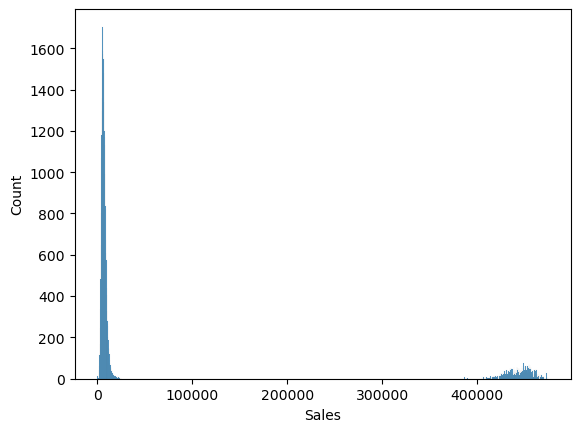

In [90]:
sns.histplot(df2, x="Sales")

In [91]:
df = df[df2.columns]

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984573 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      984573 non-null  int64         
 1   DayOfWeek                  984573 non-null  int64         
 2   Date                       984573 non-null  datetime64[ns]
 3   Open                       984573 non-null  int64         
 4   Promo                      984573 non-null  int64         
 5   SchoolHoliday              984573 non-null  int64         
 6   StateHoliday_0             984573 non-null  uint8         
 7   StateHoliday_a             984573 non-null  uint8         
 8   Week                       984573 non-null  UInt32        
 9   Month                      984573 non-null  int64         
 10  Year                       984573 non-null  UInt32        
 11  Promo2                     984573 non-null  int64  

In [93]:
df2.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
SchoolHoliday                0
StateHoliday_0               0
StateHoliday_a               0
Week                         0
Month                        0
Year                         0
Promo2                       0
is_promo                     0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2SinceWeek              0
Promo2SinceYear              0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
StateHoliday_b               0
StateHoliday_c               0
Customers                    0
Sales                        0
dtype: int64

In [94]:
df_final = pd.concat([df, df2], ignore_index=True)

In [95]:
df_final

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Week,Month,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_b,StateHoliday_c,Customers,Sales
0,1,5,2015-07-31,1,1,1,1,0,31,7,...,0,1,0,1,0,0,0,0,555,5263
1,1,4,2015-07-30,1,1,1,1,0,31,7,...,0,1,0,1,0,0,0,0,546,5020
2,1,3,2015-07-29,1,1,1,1,0,31,7,...,0,1,0,1,0,0,0,0,523,4782
3,1,2,2015-07-28,1,1,1,1,0,31,7,...,0,1,0,1,0,0,0,0,560,5011
4,1,1,2015-07-27,1,1,1,1,0,31,7,...,0,1,0,1,0,0,0,0,612,6102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024829,1094,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,1,1,0,0,0,0,6,448408
1024830,1102,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,0,1,0,0,0,0,5,418714
1024831,1104,6,2015-08-15,0,0,0,0,1,33,8,...,0,0,1,1,0,0,0,0,6,459107
1024832,1107,6,2015-08-15,1,0,0,0,1,33,8,...,0,0,0,1,0,0,0,0,155,2510


In [96]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024834 entries, 0 to 1024833
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1024834 non-null  int64         
 1   DayOfWeek                  1024834 non-null  int64         
 2   Date                       1024834 non-null  datetime64[ns]
 3   Open                       1024834 non-null  int64         
 4   Promo                      1024834 non-null  int64         
 5   SchoolHoliday              1024834 non-null  int64         
 6   StateHoliday_0             1024834 non-null  uint8         
 7   StateHoliday_a             1024834 non-null  uint8         
 8   Week                       1024834 non-null  UInt32        
 9   Month                      1024834 non-null  int64         
 10  Year                       1024834 non-null  UInt32        
 11  Promo2                     1024834 no

In [97]:
# Al visualizar el df en powerbi vi que habia 1 dia en los cuales la tienda estaba cerrada y habia ventas.
#Esto es debido a nuestro modelo de prediccion. Por ello pongo a cero las ventas de ese dia.

for x in range(df_final.shape[0]):
    if df_final["Open"][x] == 0:
        df_final.iloc[x, df.columns.get_loc("Sales")] = 0

In [98]:
df_final.to_csv("df_final.csv")

## Lasso

In [99]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Predicción del número de consumidores

In [100]:
## Separacion de datos

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [101]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((787658, 26), (196915, 26), (787658,), (196915,))

In [102]:
lasso = linear_model.Lasso(alpha=1)

In [103]:
# Creación del modelo
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [104]:
y_pred = lasso.predict(x_test)

In [105]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6002578966044481
179.7973383613122
60775.122188861926


Con el modelo Lasso obtenemos peores resultados a la hora de predecir los customers

#### Predicción de ventas (Prueba)

In [106]:
## Separacion de datos

x_train, x_test, y_train, y_test = train_test_split(x_train_sales, y_train_sales, test_size=0.2, random_state=1)

In [107]:
lasso = linear_model.Lasso(alpha=1)

In [108]:
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [109]:
y_pred = lasso.predict(x_test)

In [110]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.897075627250761
845.7190973152708
1326797.5037329174


In [111]:
y_pred = lasso.predict(x_test_sales)

In [112]:
y_pred[y_pred < 0].shape

(5935,)

In [ ]:
df_final.to_csv("df_final.csv")

Nuesto modelo de prediccion lasso nos arroja resultados negativos a la hora de predecir las ventas. Por ello descarto este modelo.

## Random Forest Regressor


In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
# Creación del modelo
model = RandomForestRegressor(n_estimators=20, max_depth=17,n_jobs=-1, random_state=21)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=17, n_estimators=20, n_jobs=-1, random_state=21)

In [115]:
y_pred = model.predict(x_test)

In [116]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9558792802695661
494.25750397754575
568759.9471105061


In [117]:
y_pred[y_pred == 0].shape

(34084,)

In [118]:
y_pred_final = model.predict(x_test_sales)

In [119]:
df2["Sales"] = y_pred_final

<Axes: xlabel='Sales', ylabel='Count'>

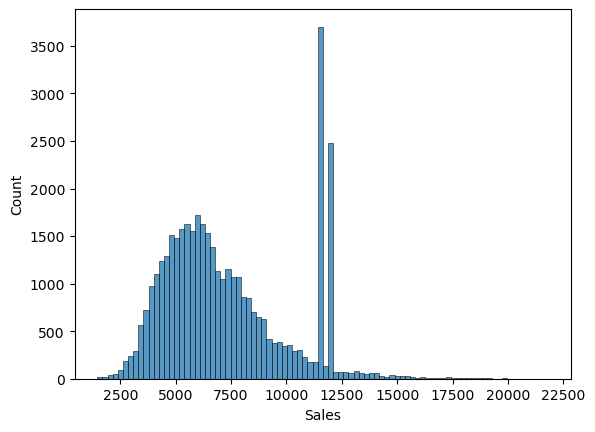

In [120]:
sns.histplot(df2, x="Sales")

Aunque nuestro random forest en las metricas parece que arroja buenos resultados, podemos comprobar en el gráfico superior que no es así. Principalmente por que en los días en los que están las tiendas cerradas, nuestro modelo si predice ventas, cosa que es erronea, de hecho no hay ningun caso en las que nuestro modelo arroje 0 ventas en los días que las tiendas no abren.

## Regresión lineal

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr = LinearRegression()

In [123]:
lr.fit(x_train, y_train)

LinearRegression()

In [124]:
y_pred = lr.predict(x_test)

In [125]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8973842213642896
844.443810247091
1322819.4187705333


In [126]:
y_pred[y_pred < 0].shape

(20236,)

In [ ]:
df_final.to_csv("df_final.csv")

## Conclusión

Tras analizar todos nuestros datos en Power BI y aplicar varios modelos, el que mejor predice nuestras ventas a futuro es el modelo de regresión lineal de machine learning. Por ello es el que hemos escogido.